In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.interpolate import interp1d
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.rc('xtick', labelsize=16) 
#plt.rc('ytick', labelsize=16) 

In [5]:
models = ['tca_standard','tca_early','tca_earlier','ref','tca_earliest']

cosmo={}
for M in models:
    cosmo[M] = Class()
    cosmo[M].set({'gauge':'synchronous',
                  'output':'tCl, lCl',
                  'omega_cdm':0.12038,
                  #'z_reio':11.357,
                  #'reionization_z_start_max':750,
                  #'z_reiomod_start':300,
                  #'recfast_Nz0':80000,
                  #'recfast_z_initial':1e7,
                  'recombination':'recfast',
                  #'recfast_H_frac':3e-4,
                  #'reio_parametrization':'reio_none',
                  #'100*theta_s':1.042143,
                  #'100*theta_s':1.02,
                  #'background_verbose':5,
                  #'input_verbose':5,
                  'tight_coupling_approximation':0,
                  'h':0.67556,
                  'lensing':'yes',
                  'a_bidm':5e-4
                 })
    if M == 'tca_early':
        cosmo[M].set({'tight_coupling_trigger_tau_c_over_tau_h':0.01,#0.012,
                      'tight_coupling_trigger_tau_c_over_tau_k':0.002,#0.008,
                      'f_bidm':0.99,
                      'A_bidm':1.7e-41,
                      'm_bidm':1,
                      'n_bidm':-4,
                      'bidm_type':'powerlaw'})
    if M == 'tca_earlier':
        cosmo[M].set({'tight_coupling_trigger_tau_c_over_tau_h':0.008,#0.01,
                      'tight_coupling_trigger_tau_c_over_tau_k':0.001,#0.005,
                      'f_bidm':0.99,
                      'A_bidm':1.7e-41,
                      'm_bidm':1,
                      'n_bidm':-4,
                      'bidm_type':'powerlaw'})
    if M == 'tca_earliest':
        cosmo[M].set({'tight_coupling_trigger_tau_c_over_tau_h':0.004,#0.05,
                      'tight_coupling_trigger_tau_c_over_tau_k':0.0005,#0.002,
                      'f_bidm':0.99,
                      'A_bidm':1.7e-41,
                      'm_bidm':1,
                      'n_bidm':-4,
                      'bidm_type':'powerlaw'})
    if M == 'tca_standard':
        cosmo[M].set({#'tight_coupling_trigger_tau_c_over_tau_h':0.01,
                      #'tight_coupling_trigger_tau_c_over_tau_k':0.005,
                      'f_bidm':0.99,
                      'A_bidm':1.7e-41,
                      'm_bidm':1,
                      'n_bidm':-4,
                      'bidm_type':'powerlaw'})
    print([M])
    cosmo[M].compute()

['tca_standard']
['tca_early']
['tca_earlier']
['ref']
['tca_earliest']


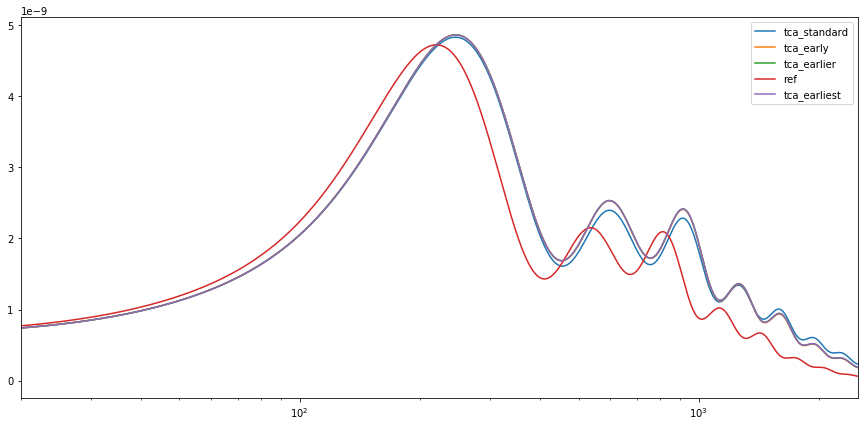

In [6]:
fig = plt.figure(1, figsize = (15,7))
ax = fig.add_subplot(111)
for M in models:
    cl = cosmo[M].lensed_cl(2500)
    l = cl['ell']
    TT = cl['tt']
    ax.semilogx(l,(l*(l+1))*TT, label=M)
ax.set_xlim(20,2.5e3)
ax.legend()

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


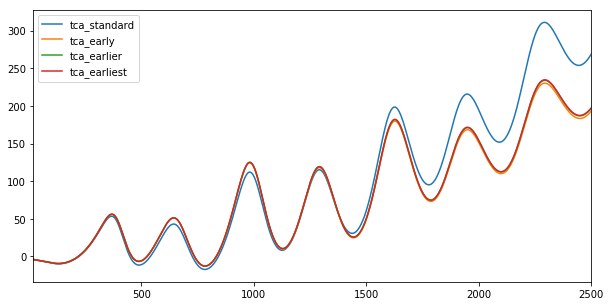

In [8]:
fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
clref = cosmo['ref'].lensed_cl(2500)
TTref = clref['tt']
for M in models:
    if M != 'ref':
        cl = cosmo[M].lensed_cl(2500)
        l = cl['ell']
        TT = cl['tt']
        ax.plot(l,100*(TT-TTref)/TTref, label=M)
ax.set_xlim(20,2.5e3)
ax.legend()

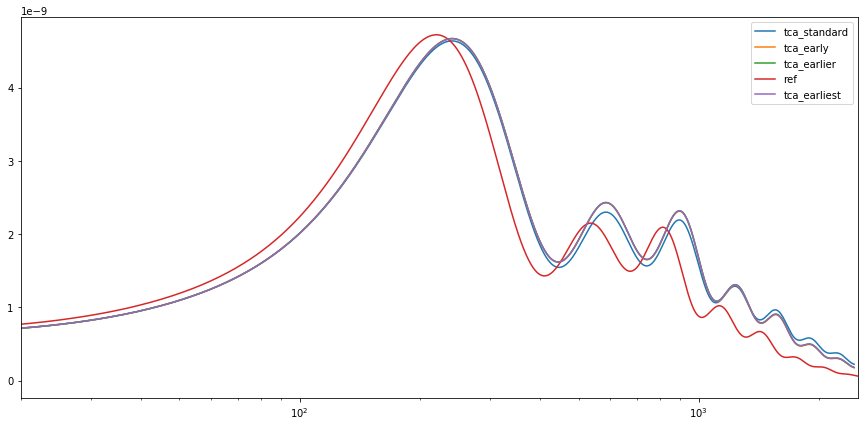

In [9]:
fig = plt.figure(1, figsize = (15,7))
ax = fig.add_subplot(111)
for M in models:
    cl = cosmo[M].lensed_cl(2500)
    l = cl['ell']
    if M != 'ref':
        l=0.98*l
    TT = cl['tt']
    ax.semilogx(l,(l*(l+1))*TT, label=M)
ax.set_xlim(20,2.5e3)
ax.legend()

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


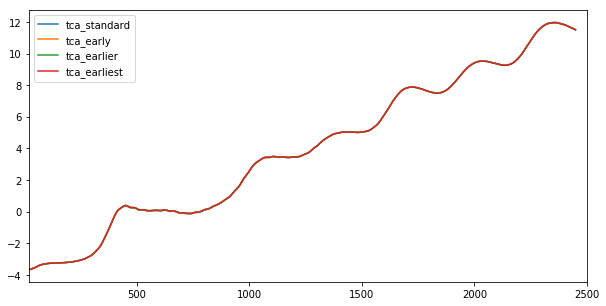

In [6]:
fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
clref = cosmo['ref'].lensed_cl(2500)
TTref = clref['tt']
for M in models:
    if M != 'ref':
        cl = cosmo[M].lensed_cl(2500)
        l = cl['ell']
        lhack = 0.98*l
        TT = cl['tt']
        TTi = interp1d(lhack,TT)
        ax.plot(l[0:2450],100*(TTi(l[0:2450])-TTref[0:2450])/TTref[0:2450], label=M)
ax.set_xlim(20,2.5e3)
plt.legend()

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


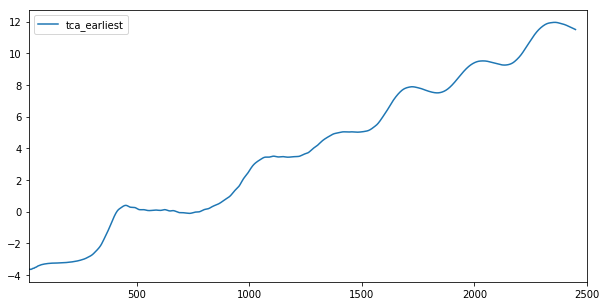

In [7]:
fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
clref = cosmo['ref'].lensed_cl(2500)
TTref = clref['tt']
cl = cosmo['tca_earliest'].lensed_cl(2500)
l = cl['ell']
lhack = 0.98*l
TT = cl['tt']
TTi = interp1d(lhack,TT)
ax.plot(l[0:2450],100*(TTi(l[0:2450])-TTref[0:2450])/TTref[0:2450], label=M)
ax.set_xlim(20,2.5e3)
plt.legend()